In [39]:
import pandas as pd
import sys
sys.path.append("../")
from date import *
import numpy as np

In [60]:
holidays = pd.read_csv('./../data/holidays_events.csv')
holidays.tail(20)

,date,type,locale,locale_name,description,transferred
330,2017-10-07,Holiday,Local,Quevedo,Cantonizacion de Quevedo,False
331,2017-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False
332,2017-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
333,2017-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False
334,2017-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
335,2017-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
336,2017-11-10,Holiday,Local,Guaranda,Independencia de Guaranda,False
337,2017-11-11,Holiday,Local,Latacunga,Independencia de Latacunga,False
338,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


In [6]:
len(holidays)

350

In [8]:
# I think, it worse to test whether local holidays actually have influence on the sales
stores = pd.read_csv('./../data/stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
stores[stores.city == 'Manta']

,store_nbr,city,state,type,cluster
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13


In [11]:
transactions = pd.read_csv('./../data/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [15]:
manta_store = transactions[transactions.store_nbr == 53]
manta_store.head()

,date,store_nbr,transactions
23817,2014-05-29,53,2545
23864,2014-05-30,53,1398
23911,2014-05-31,53,1812
23958,2014-06-01,53,2221
24005,2014-06-02,53,1085


In [29]:
manabi_holidays = holidays[holidays.locale_name=='Manabi']
manabi_holidays.head()

,date,type,locale,locale_name,description,transferred


In [61]:
ecuador_holidays = holidays[holidays.locale=='National']
ecuador_holidays

,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False


In [14]:
manta_holidays = holidays[holidays.locale_name=='Manta']
manta_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
46,2013-03-02,Holiday,Local,Manta,Fundacion de Manta,False
93,2014-03-02,Holiday,Local,Manta,Fundacion de Manta,False
164,2015-03-02,Holiday,Local,Manta,Fundacion de Manta,False
214,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6

C:\Users\Anatoliy\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


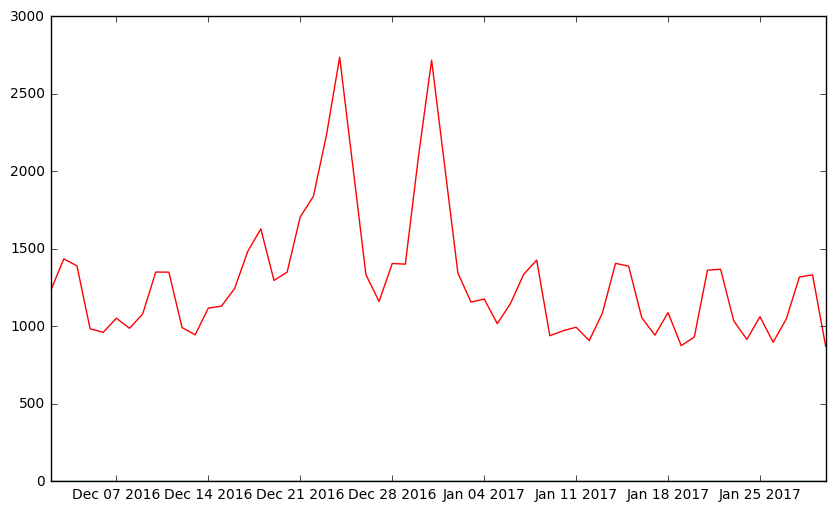

In [59]:
start = '2016-12-01'
end = '2017-01-31'
# start = '2014-07-01'
# end = '2014-09-12'
manta_store_window = manta_store[(manta_store.date > start)&(manta_store.date < end)]
manta_holidays_window = manta_holidays[(manta_holidays.date > start)&(manta_holidays.date < end)]
manta_holidays_window['vals'] = np.max(manta_store.transactions)
manta_holidays_window = manta_holidays_window.merge(manta_store_window, on='date', how='right').fillna(0.0).sort('date')

plt.plot(pd.to_datetime(manta_store_window.date), manta_store_window.transactions, 'r-',
         pd.to_datetime(manta_holidays_window.date), manta_holidays_window.vals, 'g-')

In [80]:
def plot_store_sales(store_nbr, start, end, transactions, stores, holidays):
    transactions = transactions[transactions.store_nbr == store_nbr]
    transactions = transactions[(transactions.date >= start)&(transactions.date < end)]
    
    store = stores[stores.store_nbr==store_nbr]
    print(store)
    
    local_holidays = holidays[holidays.locale_name == store.iloc[0]['city']]
    local_holidays = local_holidays[(local_holidays.date >= start)&(local_holidays.date < end)]
    local_holidays['local'] = np.max(transactions.transactions)
    transactions = transactions.merge(local_holidays[['date', 'local']], on='date', how='left')
    
    region_holidays = holidays[holidays.locale_name == store.iloc[0]['state']]
    region_holidays = region_holidays[(region_holidays.date >= start)&(region_holidays.date < end)]
    region_holidays['region'] = np.max(transactions.transactions)
    transactions = transactions.merge(region_holidays[['date', 'region']], on='date', how='left')
    
    national_holidays = holidays[holidays.locale == 'National']
    national_holidays = national_holidays[(national_holidays.date >= start)&(national_holidays.date < end)]
    national_holidays['national'] = np.max(transactions.transactions)
    transactions = transactions.merge(national_holidays[['date', 'national']], on='date', how='left')
    
    transactions.fillna(0.0, inplace=True)
    transactions.date = pd.to_datetime(transactions.date)
    
    plt.plot(transactions.date, transactions.transactions, 'y-',
             transactions.date, transactions.local, 'r-',
             transactions.date, transactions.region, 'g-',
             transactions.date, transactions.national, 'b-')
    return transactions

    store_nbr   city   state type  cluster
52         53  Manta  Manabi    D       13


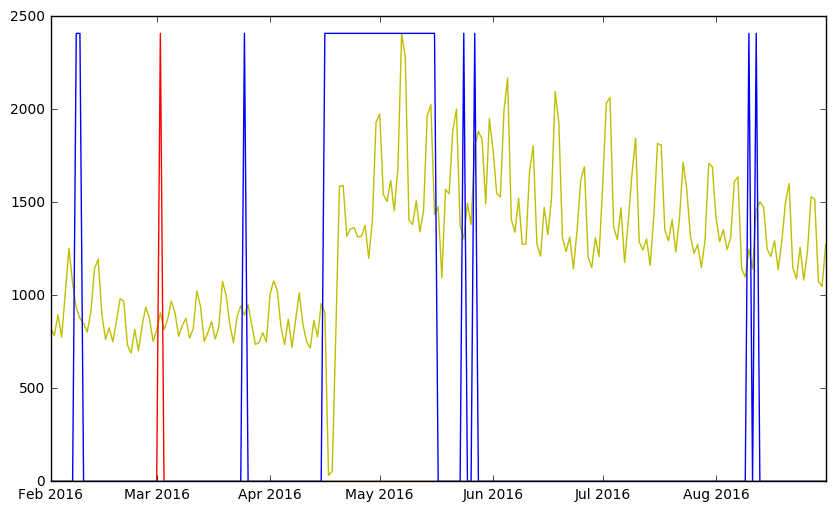

In [89]:
t = plot_store_sales(53, '2016-02-01', '2016-09-01', transactions, stores, holidays)

In [95]:
from dateutil.parser import parse
parse('22-10-2017').day

22